<a href="https://colab.research.google.com/github/NayanKanaparthi/Sarcasm-Detection/blob/main/NewsHeadlines_Sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow
#!pip install keras|

In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000
embedding_dim =16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_token = "<OOV>"
training_size = 20000

In [ ]:
import json

datastore = []
with open("/content/drive/MyDrive/Machine learning/NLP/Sarcasm_Headlines_Dataset_v2.json", 'r') as f:
    for line in f:
        datastore.append(json.loads(line))

sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])



In [ ]:
training_sentences= sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

training_padded= pad_sequences(training_sequences, maxlen= max_length, padding= padding_type,truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen= max_length, padding= padding_type,truncating=trunc_type)
# labels are 0 and 1, so we can used them directly we dont have to pad them.

In [ ]:
import numpy as np
training_padded= np.array(training_padded)
training_labels=np.array(training_labels)

testing_padded= np.array(testing_padded)
testing_labels= np.array(testing_labels)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.6679 - accuracy: 0.5857 - val_loss: 0.5702 - val_accuracy: 0.8087 - 4s/epoch - 7ms/step
Epoch 2/30
625/625 - 3s - loss: 0.4358 - accuracy: 0.8314 - val_loss: 0.3809 - val_accuracy: 0.8401 - 3s/epoch - 5ms/step
Epoch 3/30
625/625 - 4s - loss: 0.3228 - accuracy: 0.8719 - val_loss: 0.3594 - val_accuracy: 0.8386 - 4s/epoch - 7ms/step
Epoch 4/30
625/625 - 3s - loss: 0.2720 - accuracy: 0.8945 - val_loss: 0.3344 - val_accuracy: 0.8561 - 3s/epoch - 5ms/step
Epoch 5/30
625/625 - 3s - loss: 0.2367 - accuracy: 0.9090 - val_loss: 0.3326 - val_accuracy: 0.8554 - 3s/epoch - 4ms/step
Epoch 6/30
625/625 - 3s - loss: 0.2096 - accuracy: 0.9218 - val_loss: 0.3386 - val_accuracy: 0.8537 - 3s/epoch - 5ms/step
Epoch 7/30
625/625 - 4s - loss: 0.1892 - accuracy: 0.9280 - val_loss: 0.3501 - val_accuracy: 0.8491 - 4s/epoch - 7ms/step
Epoch 8/30
625/625 - 3s - loss: 0.1705 - accuracy: 0.9384 - val_loss: 0.3802 - val_accuracy: 0.8387 - 3s/epoch - 5ms/step
Epoch 9/30
625/625 - 3s 

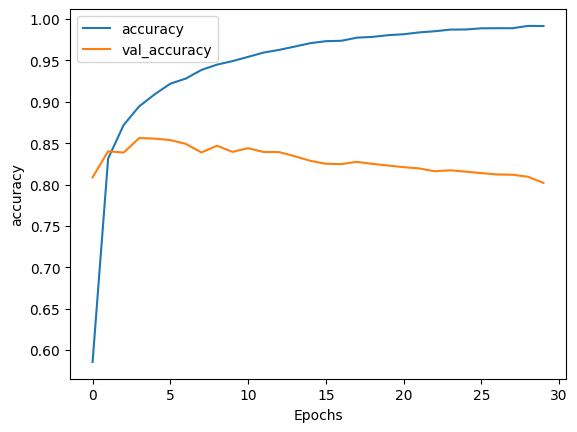

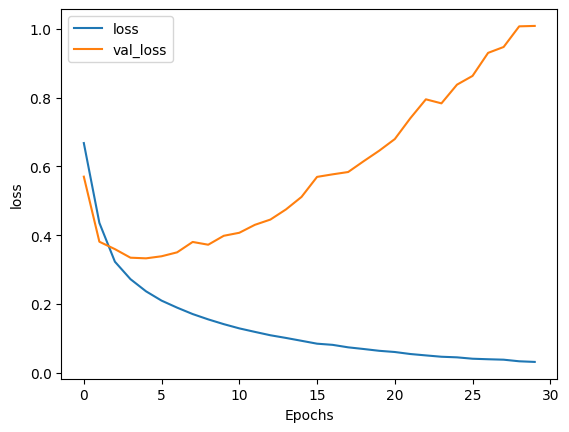

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

<OOV> scientists unveil doomsday clock of hair loss ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
eat your veggies: 9 deliciously different recipes
0


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#example:
sentence =["granny starting to fear spiders in the garden might be real","the weather today is bright and sunny"]
sequences= tokenizer.texts_to_sequences(sentence)
padded= pad_sequences(sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 108ms/step
[[9.714339e-01]
 [9.575098e-05]]


In [ ]:
print(np.round(3.7253714e-01))

0.0


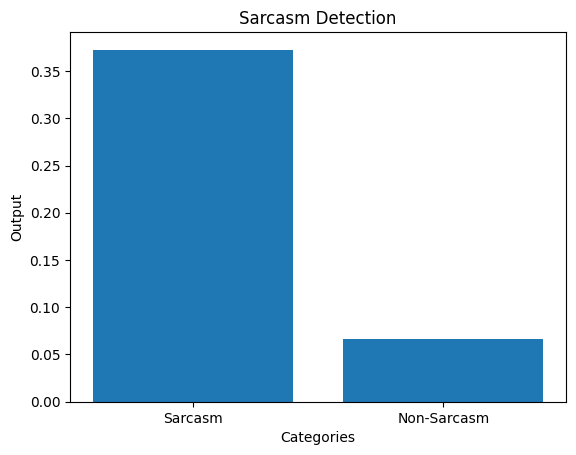

In [ ]:
import matplotlib.pyplot as plt

# Output values
output = [[3.7253714e-01], [6.6311077e-02]]

# Reshape the output to 1D
output = [val[0] for val in output]

# Categories for the x-axis
categories = ['Sarcasm', 'Non-Sarcasm']

# Plot the graph
plt.bar(categories, output)
plt.xlabel('Categories')
plt.ylabel('Output')
plt.title('Sarcasm Detection')
plt.show()

